In [1]:
from functools import partial

from imblearn.over_sampling import SMOTE
import polaris as po
import datamol as dm
import numpy as np

mapping = {
 (0.0, 0.0, 0.0): 0,
 (1.0, 0.0, 0.0): 1,
 (1.0, 0.0, 1.0): 2,
 (1.0, 1.0, 0.0): 3,
 (1.0, 1.0, 1.0): 4,
}
inv_mapping = {v: k for k, v in mapping.items()}

# load dataset
benchmark = po.load_benchmark("polaris/pkis1-kit-wt-mut-c-1")
# use ECFP fingerprint
train, test = benchmark.get_train_test_split(featurization_fn=partial(dm.to_fp, fp_type='ecfp'))

# define order of target values
target_order = ['CLASS_KIT', 'CLASS_KIT_(T6701_mutant)', 'CLASS_KIT_(V560G_mutant)']

# reshape the y values for convenience
ys = train.y
ys = np.stack([ys[target] for target in target_order], axis=1)
ys.shape

# remove the rows with NaN values
mask = ~np.any(np.isnan(ys), axis=1)
mask.sum()
X = train.X[mask]
ys = ys[mask]

ys_scalarized = [tuple(item) for item in ys]
ys_scalarized = [mapping[item] for i, item in enumerate(ys_scalarized)]

X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(X, ys_scalarized)
y_resampled = [inv_mapping[item] for i, item in enumerate(y_resampled)]


/home/ubuntu/micromamba/envs/moml-ilya/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-21 00:50:36.737 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).
2024-06-21 00:50:36.750 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).


In [8]:
benchmark = po.load_benchmark("polaris/pkis1-kit-wt-mut-c-1")
train, test = benchmark.get_train_test_split(featurization_fn=dm.to_fp)
#train, test = benchmark.get_train_test_split()

ys = train.y
ys = np.stack([ys[target] for target in benchmark.target_cols], axis=1)
mask = ~np.any(np.isnan(ys), axis=1)
mask.sum()

X_train = train.X[mask]
y_train = ys[mask]

2024-06-21 00:55:06.115 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).
2024-06-21 00:55:06.122 | INFO     | polaris._artifact:_validate_version:66 - The version of Polaris that was used to create the artifact (0.0.0) is different from the currently installed version of Polaris (dev).


In [9]:
X_resampled.shape

(1230, 2048)

In [7]:
unique_columns1 = np.all(X_resampled == X_resampled[0, :], axis=0)
filtered_arr1 = X_resampled[:, ~unique_columns1]
filtered_arr1.shape

(1230, 1784)

In [11]:
print(X_train.shape)
def remove_useless_features(data):
    unique_columns = np.all(data == data[0, :], axis=0)
    filtered_arr = data[:, ~unique_columns]
    return filtered_arr

(276, 2048)


(276, 1784)

In [25]:
ys = train.y
ys = np.stack([ys[target] for target in target_order], axis=1)

ys = ys[mask]

ys_scalarized = [tuple(item) for item in ys]
ys_scalarized = [mapping[item] for i, item in enumerate(ys_scalarized)]

X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(X, ys_scalarized)

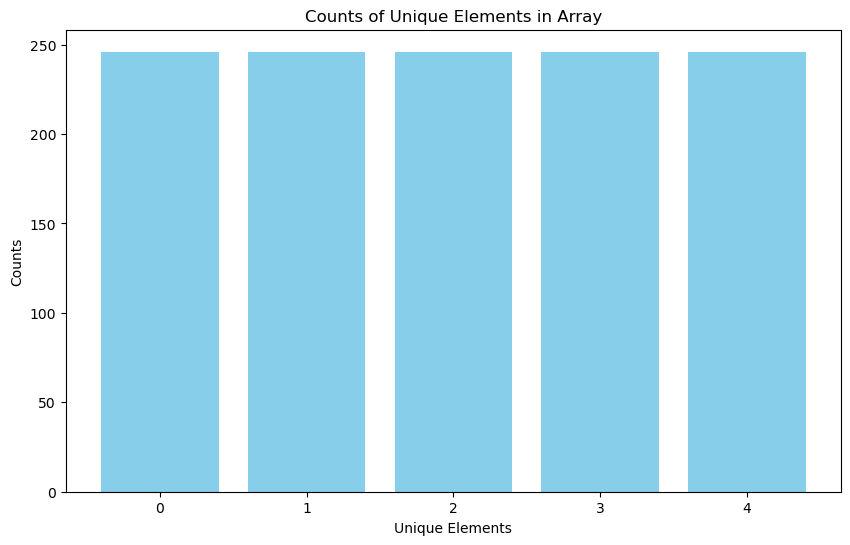

In [26]:
import matplotlib.pyplot as plt

unique_elements, counts = np.unique(y_resampled, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_elements, counts, color='skyblue')
plt.xlabel('Unique Elements')
plt.ylabel('Counts')
plt.title('Counts of Unique Elements in Array')
plt.xticks(unique_elements)  # Set x-axis ticks to the unique elements
plt.show()